# Indicators of Heavy Traffic on I-94

## Introduction

In this project, we will analyse a dataset about the westbound traffic of the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The dataset was made available by John Hogue and can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

Our analysis aims to determine a few indicators of heavy traffic on I-94. Understanding what indicators contribute to the severity of traffic could aid in making informed and data-driven decisions on how to prepare and potentially reduce the impact of these.

A short description of each of the categories in our dataset are as follows:

* `holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair
* `temp` - Numeric Average temp in kelvin
* `rain_1h` - Numeric Amount in mm of rain that occurred in the hour
* `snow_1h` - Numeric Amount in mm of snow that occurred in the hour
* `clouds_all` - Numeric Percentage of cloud cover
* `weather_main` - Categorical Short textual description of the current weather
* `weather_description` - Categorical Longer textual description of the current weather
* `date_time` - DateTime Hour of the data collected in local CST time
* `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## The I-94 Traffic Dataset

In [1]:
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

traffic.head()  ## First five rows of dataframe.

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()  ## Last five rows of dataframe. 

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Our data shows us that there are 48203 rows and nine columns. Each entry describes hourly weather features and holidays included for impact on traffic volume between 09:00, 02/10/2012 and 23:00, 30/09/2018. Moreover, there are no non-null values and three different dtypes: object, float64, and int64. 

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only recorded westbound traffic (moving from east to west). Therefore, the results of our analysis will only be relevant for westbound traffic in proximity of this station and not for the entire I-94 highway. 

## Analyzing Traffic Volume

We're going to start our analysis by examining the distribution of the traffic_volume column.

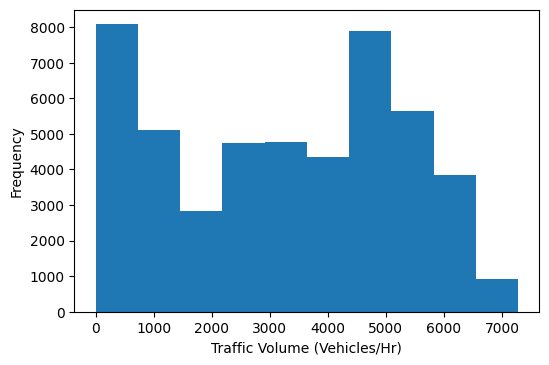

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline 

traffic["traffic_volume"].plot.hist()
plt.xlabel("Traffic Volume (Vehicles/Hr)")
plt.show()

In [5]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 9:00, 02/10/2012 and 23:00, 30/09/2018, the hourly traffic volume ranged from a minimum of 0 to a maximum of 7280, with an average of 3260 and a median of 3380.

The histogram shows us that there are two peaks ~8000 incidence values 0-500 vehicles/hr and 4500-5000 vehicles/hr. These two peaks may represent differences in traffic volume due to the time of day, i.e. periods at night may record less traffic volume than during the day-time, rush-hour periods.  

With this in mind, let's compare day-time with night-time data to see if different periods of the day influence traffic volume:

## Traffic Volume: Day vs. Night

As the recorded data were collected every hour of the day, we will divide the dataset into two parts. Although not perfect, these represent day-time and night-time periods:

* Day-time: Between 07:00-19:00
* Night-time: Between 19:00-07:00

In [6]:
## Converting the date_time column to datetime ##

traffic["date_time"] = pd.to_datetime(traffic["date_time"])

## Isolating day and night time data ##

day_time = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
print(day_time.shape)

night_time = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]
print(night_time.shape)

(23877, 9)
(24327, 9)


## Traffic Volume: Day vs. Night (II)

Now to compare the traffic volume at night and during the day:

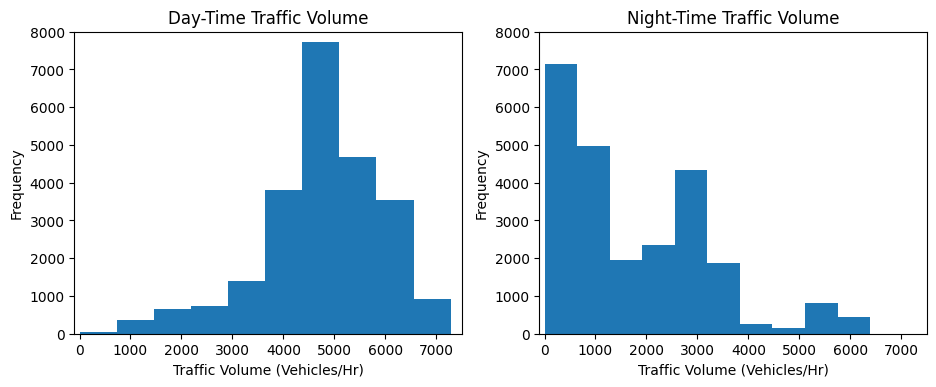

In [7]:
## Plotting Histograms for Day and Night Traffic Volume ##

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.hist(day_time["traffic_volume"])
plt.title("Day-Time Traffic Volume")
plt.xlabel("Traffic Volume (Vehicles/Hr)")
plt.ylabel("Frequency")
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night_time["traffic_volume"])
plt.title("Night-Time Traffic Volume")
plt.xlabel("Traffic Volume (Vehicles/Hr)")
plt.ylabel("Frequency")
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.show()

In [8]:
## Descriptive Statistics ##

day_time["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [9]:
night_time["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for the daytime traffic volume shows that the distribution is left-skewed, meaning that most traffic volume is on the higher end of the range - confirmed by only 25% of the traffic volume being below 4252 vehicles/hr while the remaining 75% being above this volume.

In contrast, the histogram for night-time data is right-skewed, meaning that most traffic volume values are low. Statistically, 75% of the traffic volume was 2819 vehicles/hr or less. 

From this, we can see that the majority of traffic volume is in the daytime. Though there are instances of high traffic volumes during the night, the frequency of these is relatively few. As we aim to find indicators of heavy traffic, we will focus on daytime data moving forward.

## Time Indicators

One possible indicator of heavy traffic is time. For example, there may be more people using the roads during certain months, days, and times of the day.

Therefore, we will look at a few line plots showing how traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

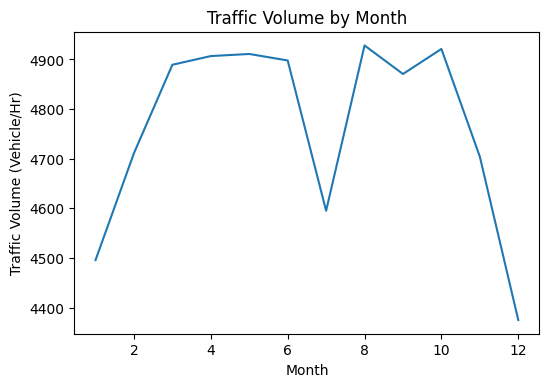

In [10]:
## Getting Line Graph for Average Traffic Volume for Each Month ##

day_time["month"] = day_time["date_time"].dt.month  # creating new column where each value describes the month
by_month = day_time.groupby("month").mean()  # group dataset by month column with mean as aggregate function.
by_month["traffic_volume"].plot.line()
plt.title("Traffic Volume by Month")
plt.ylabel("Traffic Volume (Vehicle/Hr)")
plt.xlabel("Month")
plt.show()

The line graph shows that the traffic volume is lowest between November and February and is highest between March-June and August-October. There is one exception, which is July.

Let's investigate how the traffic volume has changed in July of each year:

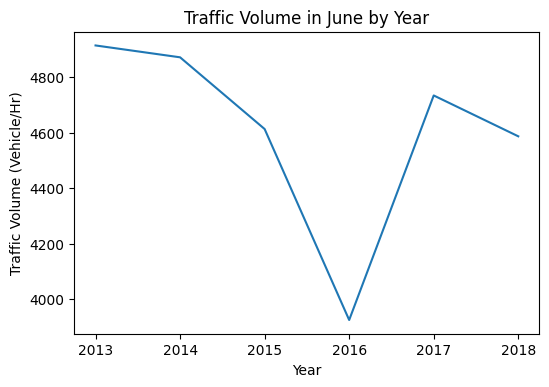

In [11]:
day_time["year"] = day_time["date_time"].dt.year
only_july = day_time[day_time["month"] == 7]  # creating a df with July as the filter.
only_july.groupby("year").mean()["traffic_volume"].plot.line() # grouping dataset by year; filtering for "traffic_volume"
plt.title("Traffic Volume in June by Year")
plt.ylabel("Traffic Volume (Vehicle/Hr)")
plt.xlabel("Year")
plt.show()

We can see that there was quite a dramatic fall in traffic volume in 2016 July. A brief Google search (found [here](https://www.mlive.com/news/ann-arbor/2016/06/road_construction_projects_tha.html)) suggests that road construction was taking place in the early days of this month.

Knowing this information, we can deduce that this result was an anomaly, and assume that traffic volume is normally consistently highest in March-October, each year - suggesting that traffic volume is highest in the warmer months and lowest in the colder months (November-February).

## Time Indicators - Day of the Week

We will now building line plots for days of the week:

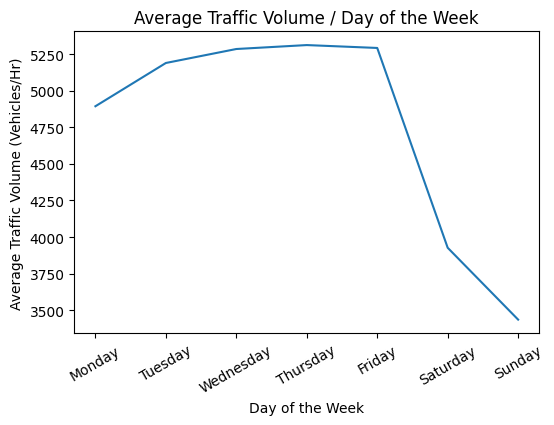

In [28]:
day_time["dayofweek"] = day_time["date_time"].dt.dayofweek
by_dayofweek = day_time.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"].plot.line()    # 0 is Monday, 6 is Sunday.
plt.title("Average Traffic Volume / Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Traffic Volume (Vehicles/Hr)")
plt.xticks([0,1,2,3,4,5,6],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], rotation=30)
plt.show()

The line graph shows us that the average traffic volume is highest between the days of Monday and Friday, and falls dramatically over the weekend (Saturday and Sunday).

## Time Indicators - Time of the Day

Now that we know that traffic volume is significantly heavier on weekdays, we will generate line plots for the time of day. However, as the weekend values will bring down the overall average, we will look at the weekday and weekend average seperately:

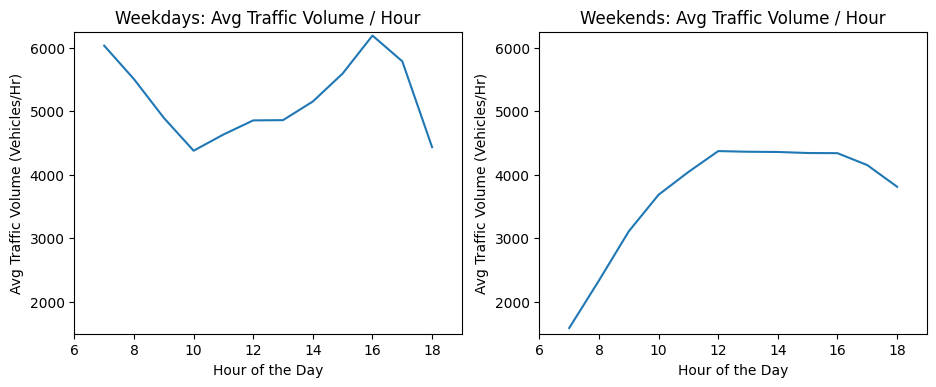

In [34]:
day_time["hour"] = day_time["date_time"].dt.hour
week_days = day_time.copy()[day_time["dayofweek"] <= 4]  # 4 == Friday
weekend = day_time.copy()[day_time["dayofweek"] >= 5]  # 5 == Saturday
by_hour_weekdays = week_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
by_hour_weekdays["traffic_volume"].plot.line()
plt.title("Weekdays: Avg Traffic Volume / Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Traffic Volume (Vehicles/Hr)")
plt.xlim(6, 19)
plt.ylim(1500,6250)

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Weekends: Avg Traffic Volume / Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Traffic Volume (Vehicles/Hr)")
plt.xlim(6, 19)
plt.ylim(1500,6250)

plt.show()


The first thing to note from our line graphs is that the traffic volume is consistently higher during each daytime hour on the weekdays compared to the weekends.

Additionally, on the weekdays (Mon-Fri), the traffic is at its highest at 07:00 and 16:00, which likely reflects people travelling to and back from work. In contrast, the weekend traffic volume is at its lowest at 07:00 and progressively climbs throughout the day until it peaks at noon before steadily declining after 16:00. 

To summarise our findings regarding time indicators for heavy traffic:

* The traffic is usually heavier during the warm months (March-October) and lighter in the cold months (November-February).
* The traffic volume is higher on business days compared to weekends.
* On weekdays, the rush hours are around 07:00 and 16:00.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with some useful columns about weather which will help with our analysis: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

For the columns that are numerical, we can start by looking to see if their are any correlations between them and traffic volume:

In [39]:
day_time.corr()["traffic_volume"][["temp", "rain_1h", "snow_1h", "clouds_all"]]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

There appears to be a slight positive (+0.13) correlation between temperature and traffic volume. We can visualise this with a scatter plot:

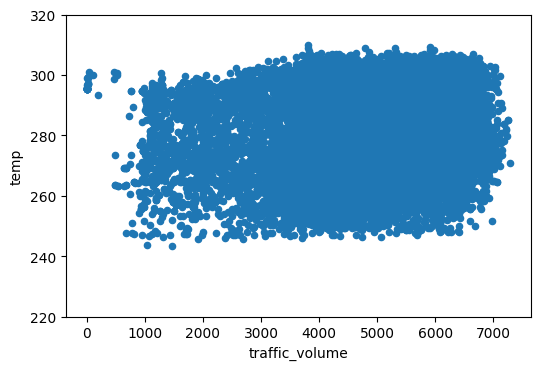

In [43]:
day_time.plot.scatter("traffic_volume", "temp")
plt.ylim(220,320)
plt.show()

Although, technically, there is a slight positive correlation between temperate and traffic volume, the scatter plot above shows that this is very minimal and not worth considering. 

Let's now look at the non-numerical weather columns: `weather_main` and `weather_description`.

## Weather Types

In [48]:
## Calculating the average traffic volume associated with each unique value in the two columns ##

by_weather_main = day_time.groupby("weather_main").mean()
by_weather_description = day_time.groupby("weather_description").mean()

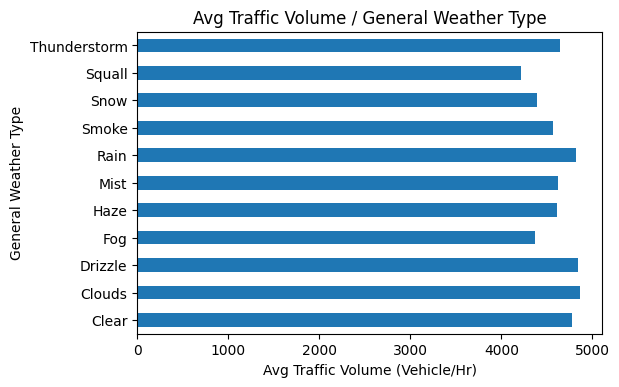

In [50]:
by_weather_main["traffic_volume"].plot.barh()
plt.title("Avg Traffic Volume / General Weather Type")
plt.xlabel("Avg Traffic Volume (Vehicle/Hr)")
plt.ylabel("General Weather Type")
plt.show()

The bar plot shows that there is no general weather type that exceeds the 5000 average traffic volume. This makes finding a heavy traffic indicator more difficult.

However, let's look at the `weather_description` column, which gives us more specific weather classifications:

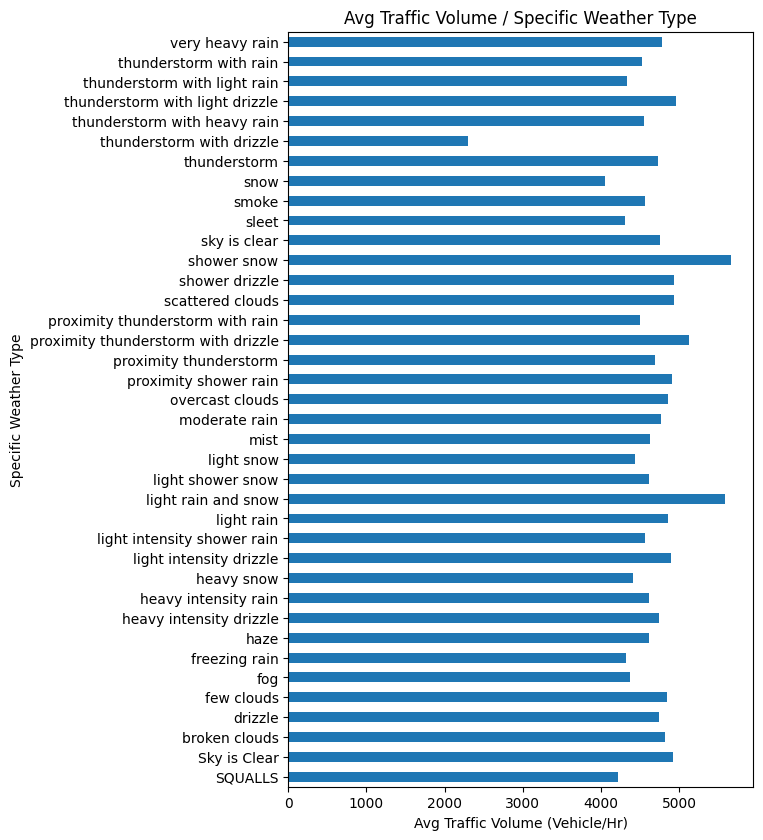

In [55]:
by_weather_description["traffic_volume"].plot.barh(figsize=(6,10))
plt.title("Avg Traffic Volume / Specific Weather Type")
plt.xlabel("Avg Traffic Volume (Vehicle/Hr)")
plt.ylabel("Specific Weather Type")
plt.show()

This bar plot shows us that three specific weather types may be indicators of heavy traffic:

* Shower snow
* Proximity thunderstorm with drizzle
* Light rain and snow

It's unclear why these weather types have the highest average traffic values — this is bad weather, but not that bad. However, if we look at the value counts of each weather description (below), we can see that there are not many instances of these types of weather, e.g. "shower snow" only has a single entry. With so few data points, we can't draw valid conclusions about whether these are true indicators of heavy traffic regardless.

In [60]:
day_time["weather_description"].value_counts()

sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain    

## Conclusion

This project aimed to determine indicators of heavy traffic on the I-94 Interstate highway. There were two types of indicators that we analysed and our findings were as follows:

* Time indicators
    * The traffic is usually heavier during warm months (March-October) compared to cold months (November-February)
    * The traffic is usually heavier on weekdays compared to weekends
    * The traffic volume is higher on business days compared to weekends.
    * On weekdays, the rush hours are around 07:00 and 16:00.

* Weather indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle 

Though, as mentioned above, we would need more data to conclude whether the weather indicators are valid or not. 